In [147]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge , Lasso , Perceptron
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from IPython.display import clear_output

In [148]:
df = pd.read_csv('/kaggle/input/fpl2122/fpl2122.csv')
df.rename(columns = {'total_points':'points'}, inplace = True)

In [149]:
df

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Eric Bailly,DEF,Man Utd,0.0,0,0,0,0,0.0,286,...,5,0.0,0,0,0,0,50,True,0,1
1,Keinan Davis,FWD,Aston Villa,0.4,0,0,0,0,0.0,49,...,3,0.0,0,0,0,0,45,False,0,1
2,Ayotomiwa Dele-Bashiru,MID,Watford,0.0,0,0,0,0,0.0,394,...,3,0.0,0,0,0,0,45,True,0,1
3,James Ward-Prowse,MID,Southampton,2.3,0,0,20,0,30.5,341,...,3,0.0,2,0,0,0,65,False,0,1
4,Bruno Miguel Borges Fernandes,MID,Man Utd,4.4,0,3,61,0,35.9,277,...,5,59.0,20,0,0,0,120,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25442,Wilfred Ndidi,MID,Leicester,0.0,0,0,0,0,0.0,216,...,4,0.0,0,-202,22,224,48,True,0,38
25443,Matt Ritchie,DEF,Newcastle,0.9,0,0,3,0,0.0,292,...,1,0.0,1,143,396,253,49,False,0,38
25444,Nathan Redmond,MID,Southampton,3.4,0,0,5,0,0.0,336,...,4,0.0,2,455,683,228,59,False,0,38
25445,Mathew Ryan,GK,Brighton,0.0,0,0,0,0,0.0,65,...,3,0.0,0,-2,0,2,45,True,0,38


In [150]:
df.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Eric Bailly,DEF,Man Utd,0.0,0,0,0,0,0.0,286,...,5,0.0,0,0,0,0,50,True,0,1
1,Keinan Davis,FWD,Aston Villa,0.4,0,0,0,0,0.0,49,...,3,0.0,0,0,0,0,45,False,0,1
2,Ayotomiwa Dele-Bashiru,MID,Watford,0.0,0,0,0,0,0.0,394,...,3,0.0,0,0,0,0,45,True,0,1
3,James Ward-Prowse,MID,Southampton,2.3,0,0,20,0,30.5,341,...,3,0.0,2,0,0,0,65,False,0,1
4,Bruno Miguel Borges Fernandes,MID,Man Utd,4.4,0,3,61,0,35.9,277,...,5,59.0,20,0,0,0,120,True,0,1


In [151]:
bruno_element = df[df['name'] == 'Bruno Miguel Borges Fernandes']['element'].values[0]

In [152]:
df[df['element'] == bruno_element]

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
4,Bruno Miguel Borges Fernandes,MID,Man Utd,4.4,0,3,61,0,35.9,277,...,5,59.0,20,0,0,0,120,True,0,1
558,Bruno Miguel Borges Fernandes,MID,Man Utd,11.0,0,0,7,0,30.2,277,...,1,29.0,1,414059,436157,22098,121,False,1,2
1124,Bruno Miguel Borges Fernandes,MID,Man Utd,8.2,0,0,4,1,25.8,277,...,0,23.0,2,-3080,149207,152287,121,False,1,3
1701,Bruno Miguel Borges Fernandes,MID,Man Utd,4.7,0,1,33,0,33.8,277,...,4,29.0,8,-1126140,100656,1226796,120,True,0,4
2300,Bruno Miguel Borges Fernandes,MID,Man Utd,3.2,0,0,17,0,48.8,277,...,1,38.0,2,-552801,55156,607957,120,False,0,5
2906,Bruno Miguel Borges Fernandes,MID,Man Utd,3.5,0,0,13,0,136.2,277,...,0,43.0,0,-309231,38980,348211,119,True,0,6
3517,Bruno Miguel Borges Fernandes,MID,Man Utd,3.8,1,0,19,0,36.2,277,...,1,8.0,5,-282453,28309,310762,119,True,0,7
4130,Bruno Miguel Borges Fernandes,MID,Man Utd,3.5,1,0,24,0,104.0,277,...,4,11.0,5,-182100,24555,206655,118,False,0,8
4747,Bruno Miguel Borges Fernandes,MID,Man Utd,1.7,0,0,13,0,32.4,277,...,0,4.0,1,-193052,12297,205349,118,True,1,9
5365,Bruno Miguel Borges Fernandes,MID,Man Utd,4.5,1,0,25,1,38.9,277,...,0,4.0,6,-239751,10714,250465,117,False,0,10


In [153]:
df.columns.to_list()

['name',
 'position',
 'team',
 'xP',
 'assists',
 'bonus',
 'bps',
 'clean_sheets',
 'creativity',
 'element',
 'fixture',
 'goals_conceded',
 'goals_scored',
 'ict_index',
 'influence',
 'kickoff_time',
 'minutes',
 'opponent_team',
 'own_goals',
 'penalties_missed',
 'penalties_saved',
 'red_cards',
 'round',
 'saves',
 'selected',
 'team_a_score',
 'team_h_score',
 'threat',
 'points',
 'transfers_balance',
 'transfers_in',
 'transfers_out',
 'value',
 'was_home',
 'yellow_cards',
 'GW']

In [154]:
df_new = df[['element' , 'round' , 'position' , 'team' , 'ict_index' , 'minutes' , 'opponent_team' , 'selected' , 'points' , 'transfers_in' , 'transfers_out' , 'assists' , 'clean_sheets', 'creativity' , 'goals_conceded' , 'goals_scored' , 'own_goals' , 'penalties_missed' , 'penalties_saved' , 'red_cards' , 'saves' , 'threat' , 'yellow_cards']]
df_new['net_transfers'] = df_new['transfers_in'] - df_new['transfers_out']
df_new = df_new.drop(['transfers_in' , 'transfers_out'] , axis = 1)
df_new = df_new.replace('GKP' , 'GK')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [155]:
df_new

,element,round,position,team,ict_index,minutes,opponent_team,selected,points,assists,...,goals_conceded,goals_scored,own_goals,penalties_missed,penalties_saved,red_cards,saves,threat,yellow_cards,net_transfers
0,286,1,DEF,Man Utd,0.0,0,10,9363,0,0,...,0,0,0,0,0,0,0,0.0,0,0
1,49,1,FWD,Aston Villa,0.0,0,18,169789,0,0,...,0,0,0,0,0,0,0,0.0,0,0
2,394,1,MID,Watford,0.0,0,2,4092,0,0,...,0,0,0,0,0,0,0,0.0,0,0
3,341,1,MID,Southampton,5.2,90,8,299682,2,0,...,3,0,0,0,0,0,0,0.0,0,0
4,277,1,MID,Man Utd,20.1,90,10,3381004,20,0,...,1,3,0,0,0,0,0,59.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25442,216,38,MID,Leicester,0.0,0,16,70366,0,0,...,0,0,0,0,0,0,0,0.0,0,-202
25443,292,38,DEF,Newcastle,0.0,1,5,15999,1,0,...,0,0,0,0,0,0,0,0.0,0,143
25444,336,38,MID,Southampton,0.0,82,9,13856,2,0,...,3,0,0,0,0,0,0,0.0,0,455
25445,65,38,GK,Brighton,0.0,0,19,587,0,0,...,0,0,0,0,0,0,0,0.0,0,-2


In [156]:
pos_oh = pd.get_dummies(df_new.position , prefix = 'Pos')
df_new = df_new.drop(['position'] , axis = 1)
df_new = df_new.join(pos_oh)

team_oh = pd.get_dummies(df_new.team , prefix = 'Team')
df_new = df_new.drop(['team'] , axis = 1)
df_new = df_new.join(team_oh)

In [157]:
df_new[df_new['element'] == bruno_element]

,element,round,ict_index,minutes,opponent_team,selected,points,assists,clean_sheets,creativity,...,Team_Liverpool,Team_Man City,Team_Man Utd,Team_Newcastle,Team_Norwich,Team_Southampton,Team_Spurs,Team_Watford,Team_West Ham,Team_Wolves
4,277,1,20.1,90,10,3381004,20,0,0,35.9,...,0,0,1,0,0,0,0,0,0,0
558,277,2,7.2,90,16,4305673,1,0,0,30.2,...,0,0,1,0,0,0,0,0,0,0
1124,277,3,5.5,90,20,4391403,2,0,1,25.8,...,0,0,1,0,0,0,0,0,0,0
1701,277,4,10.0,84,14,3298340,8,0,0,33.8,...,0,0,1,0,0,0,0,0,0,0
2300,277,5,10.5,90,19,2797372,2,0,0,48.8,...,0,0,1,0,0,0,0,0,0,0
2906,277,6,20.7,90,2,2516238,0,0,0,136.2,...,0,0,1,0,0,0,0,0,0,0
3517,277,7,6.7,90,8,2247981,5,1,0,36.2,...,0,0,1,0,0,0,0,0,0,0
4130,277,8,15.4,90,9,2078240,5,1,0,104.0,...,0,0,1,0,0,0,0,0,0,0
4747,277,9,4.4,61,11,1885663,1,0,0,32.4,...,0,0,1,0,0,0,0,0,0,0
5365,277,10,7.7,75,17,1649817,6,1,1,38.9,...,0,0,1,0,0,0,0,0,0,0


In [158]:
l = ['points', 'minutes' , 'assists' , 'clean_sheets', 'creativity' , 'goals_conceded' , 'goals_scored' , 'own_goals' , 'penalties_missed' , 'penalties_saved' , 'red_cards' , 'saves' , 'threat' , 'yellow_cards']
n = 3

In [159]:
for i in l:
    df_new[i + '_sofar'] = df_new.groupby('element')[i].cumsum()
    df_new[i + '_sofar'] = df_new.groupby('element')[i + '_sofar'].shift(1 , fill_value= 0)
    
    df_new[i + '_last' + str(n)] = df_new.groupby('element')[i].transform(lambda s: s.rolling(n, min_periods=1).sum())
    df_new[i + '_last' + str(n)] = df_new.groupby('element')[i + '_last' + str(n)].shift(1 , fill_value= 0)
    
df_new = df_new.drop(l[1:], axis = 1)

df_new['minutes_sofar'] = df_new.groupby('element')['minutes'].cumsum()
df_new['minutes_sofar'] = df_new.groupby('element')['minutes_sofar'].shift(1 , fill_value= 0)
#df_new = df_new.drop(['minutes'], axis = 1)

In [160]:
df_new

,element,round,ict_index,opponent_team,selected,points,net_transfers,Pos_DEF,Pos_FWD,Pos_GK,...,penalties_saved_sofar,penalties_saved_last3,red_cards_sofar,red_cards_last3,saves_sofar,saves_last3,threat_sofar,threat_last3,yellow_cards_sofar,yellow_cards_last3
0,286,1,0.0,10,9363,0,0,1,0,0,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0
1,49,1,0.0,18,169789,0,0,0,1,0,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0
2,394,1,0.0,2,4092,0,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0
3,341,1,5.2,8,299682,2,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0
4,277,1,20.1,10,3381004,20,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25442,216,38,0.0,16,70366,0,-202,0,0,0,...,0,0.0,0,0.0,0,0.0,179.0,0.0,4,0.0
25443,292,38,0.0,5,15999,1,143,1,0,0,...,0,0.0,0,0.0,0,0.0,92.0,0.0,5,0.0
25444,336,38,0.0,9,13856,2,455,0,0,0,...,0,0.0,0,0.0,0,0.0,289.0,30.0,0,0.0
25445,65,38,0.0,19,587,0,-2,0,0,1,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0


In [161]:
df_new[df_new['element'] == bruno_element]

,element,round,ict_index,opponent_team,selected,points,net_transfers,Pos_DEF,Pos_FWD,Pos_GK,...,penalties_saved_sofar,penalties_saved_last3,red_cards_sofar,red_cards_last3,saves_sofar,saves_last3,threat_sofar,threat_last3,yellow_cards_sofar,yellow_cards_last3
4,277,1,20.1,10,3381004,20,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0
558,277,2,7.2,16,4305673,1,414059,0,0,0,...,0,0.0,0,0.0,0,0.0,59.0,59.0,0,0.0
1124,277,3,5.5,20,4391403,2,-3080,0,0,0,...,0,0.0,0,0.0,0,0.0,88.0,88.0,1,1.0
1701,277,4,10.0,14,3298340,8,-1126140,0,0,0,...,0,0.0,0,0.0,0,0.0,111.0,111.0,2,2.0
2300,277,5,10.5,19,2797372,2,-552801,0,0,0,...,0,0.0,0,0.0,0,0.0,140.0,81.0,2,2.0
2906,277,6,20.7,2,2516238,0,-309231,0,0,0,...,0,0.0,0,0.0,0,0.0,178.0,90.0,2,1.0
3517,277,7,6.7,8,2247981,5,-282453,0,0,0,...,0,0.0,0,0.0,0,0.0,221.0,110.0,2,0.0
4130,277,8,15.4,9,2078240,5,-182100,0,0,0,...,0,0.0,0,0.0,0,0.0,229.0,89.0,2,0.0
4747,277,9,4.4,11,1885663,1,-193052,0,0,0,...,0,0.0,0,0.0,0,0.0,240.0,62.0,2,0.0
5365,277,10,7.7,17,1649817,6,-239751,0,0,0,...,0,0.0,0,0.0,0,0.0,244.0,23.0,3,1.0


In [162]:
df_new.corr()

,element,round,ict_index,opponent_team,selected,points,net_transfers,Pos_DEF,Pos_FWD,Pos_GK,...,penalties_saved_sofar,penalties_saved_last3,red_cards_sofar,red_cards_last3,saves_sofar,saves_last3,threat_sofar,threat_last3,yellow_cards_sofar,yellow_cards_last3
element,1.000000,0.129633,-0.157826,-0.024245,-0.143120,-1.460245e-01,0.005102,-0.013109,0.018979,0.043682,...,-0.016179,-0.006719,-0.065394,-0.021171,-0.057076,-0.057561,-0.167965,-0.141890,-0.203258,-0.117727
round,0.129633,1.000000,-0.068344,-0.008335,-0.009926,-4.067952e-02,0.014221,-0.002690,-0.005500,0.004282,...,0.040311,-0.004106,0.083926,-0.004326,0.085906,0.002607,0.267869,0.001436,0.300743,-0.012811
ict_index,-0.157826,-0.068344,1.000000,0.018090,0.372431,7.620744e-01,0.169352,-0.053450,0.047644,-0.115924,...,0.003820,0.009953,0.064061,0.008021,0.014746,0.030485,0.388454,0.467146,0.232919,0.217225
opponent_team,-0.024245,-0.008335,0.018090,1.000000,0.003177,1.341640e-02,-0.001577,-0.003007,0.001500,0.002828,...,-0.004980,-0.007056,-0.006954,-0.010181,-0.001267,0.001140,-0.000637,0.007848,-0.006772,0.001510
selected,-0.143120,-0.009926,0.372431,0.003177,1.000000,3.238645e-01,0.124730,-0.005124,0.079778,0.023276,...,0.100841,0.036313,0.112016,0.025406,0.158465,0.153200,0.508346,0.462189,0.247366,0.156781
points,-0.146024,-0.040680,0.762074,0.013416,0.323864,1.000000e+00,0.138014,-0.002482,0.003497,-0.043735,...,0.038754,0.019319,0.063473,0.004179,0.107745,0.123832,0.306514,0.351549,0.210574,0.187335
net_transfers,0.005102,0.014221,0.169352,-0.001577,0.124730,1.380137e-01,1.000000,-0.004580,0.009558,-0.003957,...,0.013377,0.010108,-0.003756,-0.032875,0.009637,0.017827,0.047933,0.159805,0.013317,0.016658
Pos_DEF,-0.013109,-0.002690,-0.053450,-0.003007,-0.005124,-2.481739e-03,-0.004580,1.000000,-0.280975,-0.257187,...,-0.059903,-0.026180,0.066739,0.033149,-0.116761,-0.116578,-0.156836,-0.138988,0.087620,0.055709
Pos_FWD,0.018979,-0.005500,0.047644,0.001500,0.079778,3.496944e-03,0.009558,-0.280975,1.000000,-0.141064,...,-0.032856,-0.014359,-0.015665,-0.003413,-0.064042,-0.063941,0.204878,0.182152,-0.014272,-0.007301
Pos_GK,0.043682,0.004282,-0.115924,0.002828,0.023276,-4.373463e-02,-0.003957,-0.257187,-0.141064,1.000000,...,0.232917,0.101792,-0.044970,-0.019327,0.453993,0.453280,-0.188309,-0.171918,-0.159605,-0.100130


In [163]:
df_new = df_new.drop(['element'], axis = 1)

In [164]:
#df_new = df_new[df_new['points'] != 0]

In [165]:
df_new.corr()['points'].abs().sort_values(ascending = False)

points                    1.000000e+00
ict_index                 7.620744e-01
minutes_last3             4.591577e-01
points_last3              4.299482e-01
points_sofar              3.743243e-01
creativity_last3          3.520436e-01
threat_last3              3.515488e-01
clean_sheets_sofar        3.459232e-01
minutes_sofar             3.401114e-01
clean_sheets_last3        3.264993e-01
selected                  3.238645e-01
creativity_sofar          3.079071e-01
goals_conceded_last3      3.074623e-01
threat_sofar              3.065144e-01
goals_scored_sofar        2.768742e-01
goals_conceded_sofar      2.686507e-01
assists_sofar             2.643526e-01
goals_scored_last3        2.373367e-01
yellow_cards_sofar        2.105742e-01
assists_last3             2.049183e-01
yellow_cards_last3        1.873350e-01
net_transfers             1.380137e-01
saves_last3               1.238323e-01
saves_sofar               1.077453e-01
Team_Man City             6.349354e-02
red_cards_sofar          

In [166]:
X = df_new.drop(['points'] , axis = 1).values
Y = df_new['points'].values

In [167]:
X_train, X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.2 , shuffle = False)

In [168]:
X_train.shape, X_test.shape , Y_train.shape , Y_test.shape

((20357, 57), (5090, 57), (20357,), (5090,))

In [169]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [170]:
model = Ridge(alpha=1.0)
model.fit(X_train , Y_train)
Y_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))

0.8117137029242153


In [171]:
model = Lasso(alpha=1.0)
model.fit(X_train , Y_train)
Y_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))

1.570087503871223


In [172]:
model = SVR(kernel = 'linear')
model.fit(X_train , Y_train)
Y_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))

0.7406060140538142


In [173]:
model = SVR(kernel = 'rbf')
model.fit(X_train , Y_train)
Y_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))

0.7629179624692405


In [174]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.val_losses = []
        self.losses = []
        
        self.fig = plt.figure()
        
        self.logs = []
 
    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.val_losses.append(logs.get('val_loss'))
        self.losses.append(logs.get('loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.val_losses, label="val_loss" , marker ='o')
        plt.plot(self.x, self.losses, label="loss" , marker ='o')
        plt.legend()
        plt.show()
        
        print("Epoch :" , self.i, " | Loss :" , logs.get('loss') , " | Val Loss :" , logs.get('val_loss'))
        
plot_losses = PlotLosses()

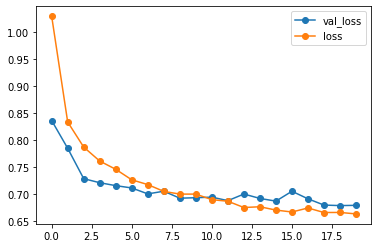

Epoch : 20  | Loss : 0.6625954508781433  | Val Loss : 0.678514838218689


In [180]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(32 , activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32 , activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32 , activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32 , activation = 'relu'))
model.add(keras.layers.Dense(1))

model.compile(loss = 'mae' , optimizer = keras.optimizers.Adam(lr = 1e-3))
history = model.fit(X_train , Y_train , validation_data = (X_test , Y_test) , epochs = 20, callbacks = [plot_losses])

In [181]:
Y_pred = model.predict(X_test)
for i in range(100):
    print(Y_test[i],round(Y_pred[i][0]),Y_pred[i])

0 0 [-0.00159583]
1 0 [-0.00151274]
2 1 [1.1821367]
1 0 [-0.00156887]
6 5 [5.000902]
0 0 [-0.00159223]
0 0 [-0.00155307]
1 2 [1.9944348]
0 0 [-0.00149699]
0 0 [-0.00149783]
0 0 [-0.00152017]
2 4 [3.6178946]
1 2 [2.1070426]
2 2 [1.6394137]
2 1 [1.4549122]
0 0 [-0.00152247]
0 0 [-0.00161927]
0 0 [-0.00147106]
0 0 [-0.00147154]
0 0 [-0.0015993]
0 0 [-0.00144659]
0 0 [-0.0014506]
0 0 [-0.00156013]
0 0 [-0.00156675]
6 4 [3.9662325]
0 0 [-0.00152858]
2 6 [5.8423305]
1 1 [1.3822502]
0 0 [-0.00159635]
1 2 [2.1688807]
7 2 [2.4713714]
0 0 [-0.00149168]
0 0 [-0.0014957]
10 5 [5.01907]
1 4 [3.832028]
0 0 [-0.00144221]
0 0 [-0.00159406]
0 0 [-0.00160991]
0 0 [-0.00148718]
0 0 [-0.00163064]
0 0 [-0.00164243]
8 3 [3.4525816]
0 0 [-0.00168797]
0 0 [-0.00144041]
0 0 [-0.00159227]
2 1 [1.072801]
0 0 [-0.00156231]
0 0 [-0.00157228]
2 2 [1.7312672]
7 8 [7.8199496]
2 1 [1.4029945]
2 2 [2.1331186]
0 0 [-0.00148375]
0 0 [-0.00148933]
0 0 [-0.00159442]
0 0 [-0.00152848]
0 0 [-0.00163139]
0 0 [-0.0016432]
0 0 